# Feature Reduction for Multivariate Time Series Data


In this notebook, we will explain how to use MetricSifter for feature reduction.

In [1]:
%reload_ext autoreload
%autoreload 2


We prepare the synthetic data simulating a failure by injecting anomalies.

In [85]:
import pandas as pd

from tests.sample_gen.generator import generate_synthetic_data

normal_data, abonormal_data, _, _, anomalous_nodes = generate_synthetic_data(num_node=20, num_edge=20, num_normal_samples=55, num_abnormal_samples=15, anomaly_type=0)
data = pd.concat([normal_data, abonormal_data], axis=0, ignore_index=True)


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

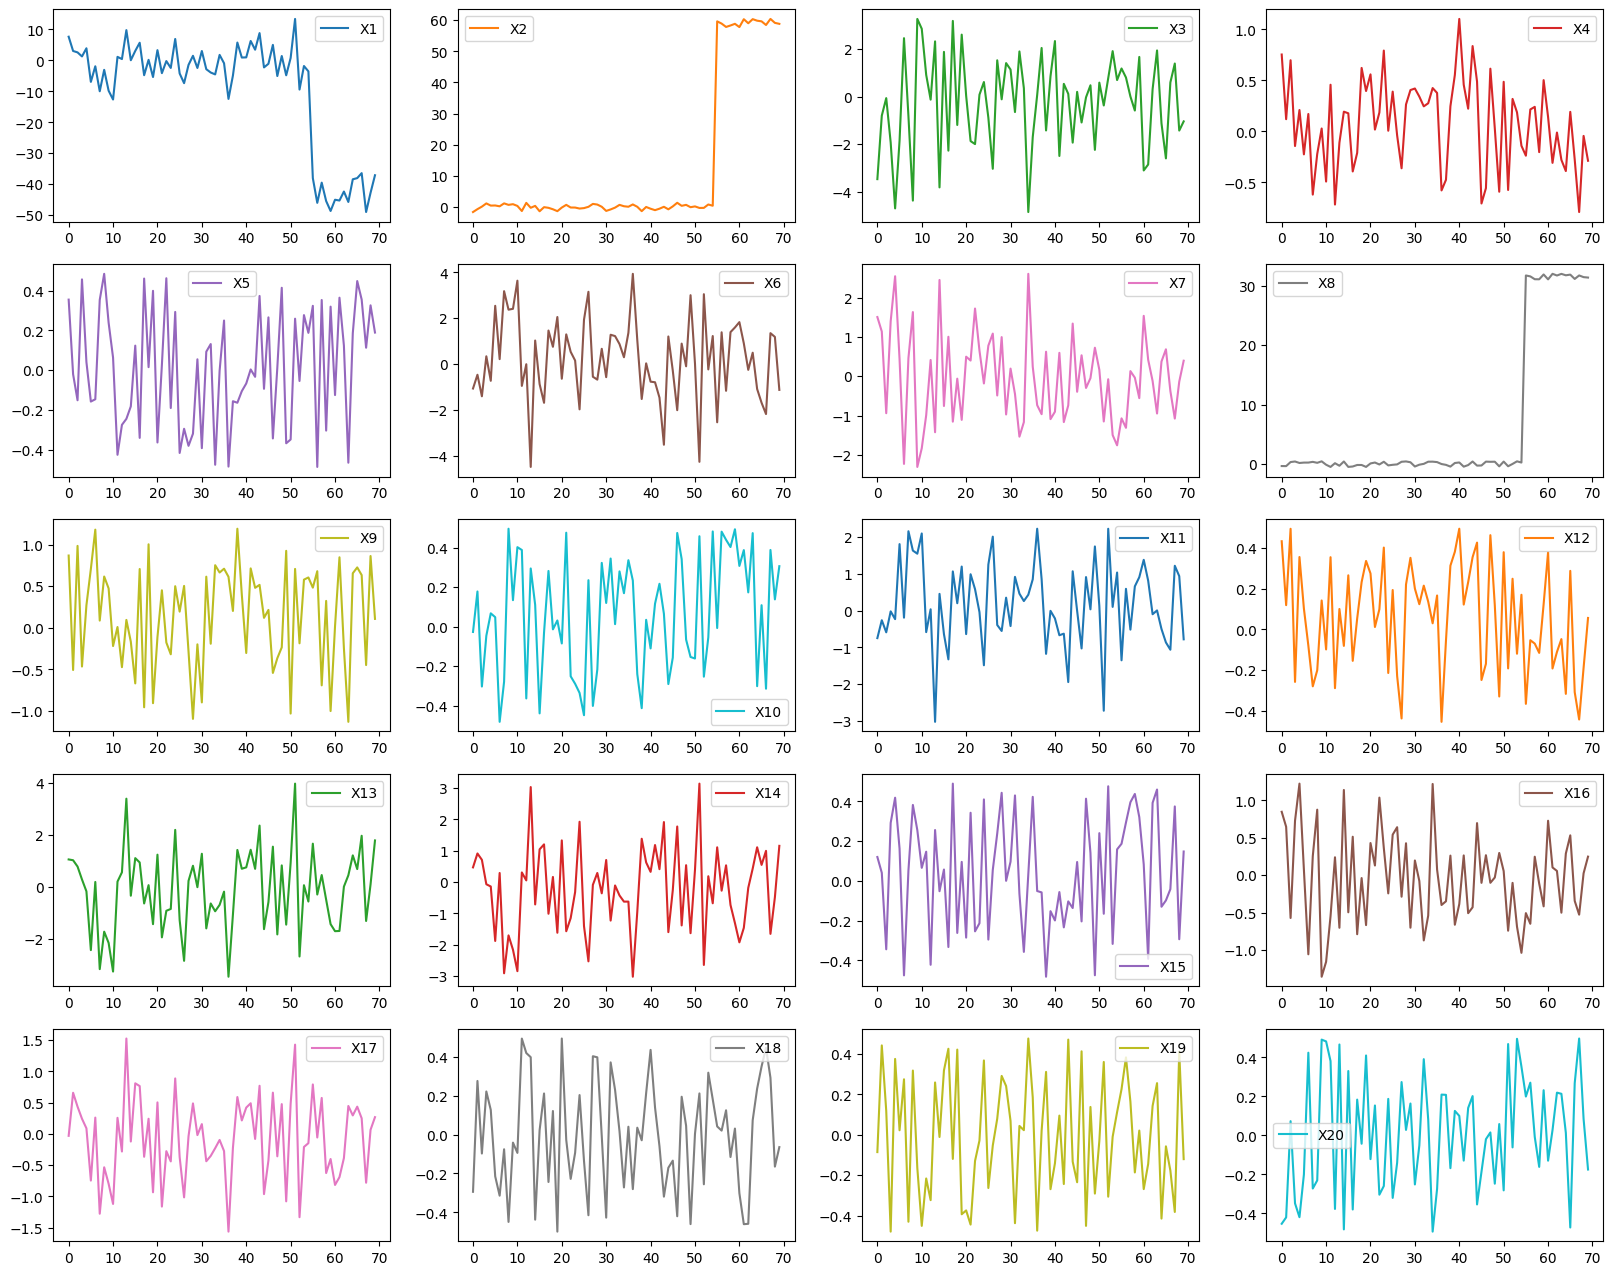

In [86]:
data.plot(subplots=True, figsize=(20, 16), kind='line', layout=(5, 4), sharex=False, sharey=False)


We remove monitoring metrics with Sifter module.

(#removed metrics) / (#total metrics): 17 / 20
difference between prediction and ground truth set()


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

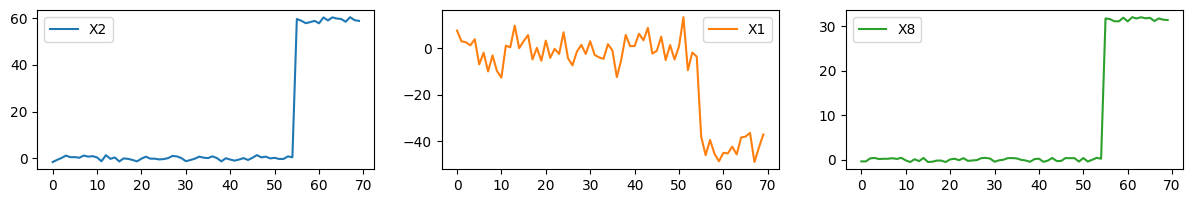

In [89]:
from metricsifter.sifter import Sifter

sifter = Sifter(penalty_adjust=2.0, n_jobs=1)
siftered_data = sifter.run(data=data)
print("(#removed metrics) / (#total metrics):", len(set(data.columns) - set(siftered_data.columns)), "/", len(data.columns))
print("difference between prediction and ground truth", set(siftered_data.columns) - anomalous_nodes)
assert set(siftered_data.columns) - anomalous_nodes == set()
siftered_data.plot(subplots=True, figsize=(20, 12), kind='line', layout=(5, 4), sharex=False, sharey=False)
